# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Data

In [106]:
df=pd.read_csv('data/salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Data Analyst,65000,GBP,79976,ES,100,GI,L
1,2023,SE,FT,Business Intelligence Analyst,115600,USD,115600,US,0,US,M
2,2023,SE,FT,Business Intelligence Analyst,79700,USD,79700,US,0,US,M
3,2023,EN,FT,Applied Scientist,281700,USD,281700,US,0,US,M
4,2023,EN,FT,Applied Scientist,141100,USD,141100,US,0,US,M


# Explore the Dataset

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8270 non-null   int64 
 1   experience_level    8270 non-null   object
 2   employment_type     8270 non-null   object
 3   job_title           8270 non-null   object
 4   salary              8270 non-null   int64 
 5   salary_currency     8270 non-null   object
 6   salary_in_usd       8270 non-null   int64 
 7   employee_residence  8270 non-null   object
 8   remote_ratio        8270 non-null   int64 
 9   company_location    8270 non-null   object
 10  company_size        8270 non-null   object
dtypes: int64(4), object(7)
memory usage: 710.8+ KB


In [108]:
df.shape

(8270, 11)

In [109]:
df.company_location.value_counts()

company_location
US    7088
GB     409
CA     181
ES     108
DE      72
      ... 
EC       1
AD       1
QA       1
MU       1
MT       1
Name: count, Length: 74, dtype: int64

For this analysis we only focuse on the company in US

In [110]:
df=df[df['company_location']=='US']

In [111]:
df.job_title.value_counts()

job_title
Data Engineer                           1722
Data Scientist                          1480
Data Analyst                            1076
Machine Learning Engineer                745
Applied Scientist                        239
                                        ... 
Managing Director Data Science             1
Staff Machine Learning Engineer            1
AI Research Engineer                       1
Machine Learning Operations Engineer       1
Principal Data Analyst                     1
Name: count, Length: 99, dtype: int64

In [115]:
df['job_title']=df['job_title'].str.replace('.*Data Analyst.*', 'Data Analyst',regex=True)
df['job_title']=df['job_title'].str.replace('.*Data Analytics.*', 'Data Analyst',regex=True)
df['job_title']=df['job_title'].str.replace('.*Data Scientist.*', 'Data Scientist',regex=True)
df['job_title']=df['job_title'].str.replace('.*Data Science.*', 'Data Scientist',regex=True)
df['job_title']=df['job_title'].str.replace('.*Machine Learning Engineer.*', 'Machine Learning Engineer',regex=True)
df['job_title']=df['job_title'].str.replace('.*Data Engineer.*', 'Data Engineer',regex=True)

In [118]:
df.job_title.value_counts()

job_title
Data Engineer                 1732
Data Scientist                1664
Data Analyst                  1154
Machine Learning Engineer      749
Applied Scientist              239
                              ... 
AWS Data Architect               1
AI Research Engineer             1
Manager Data Management          1
Cloud Data Architect             1
Machine Learning Developer       1
Name: count, Length: 62, dtype: int64

# Assumption & Visualization  

## Assumption 1
We assume that the average salary would have been increasing over year for all experience level employees.

[Text(0.5, 0, 'Work Year'), Text(0, 0.5, 'Salary in USD')]

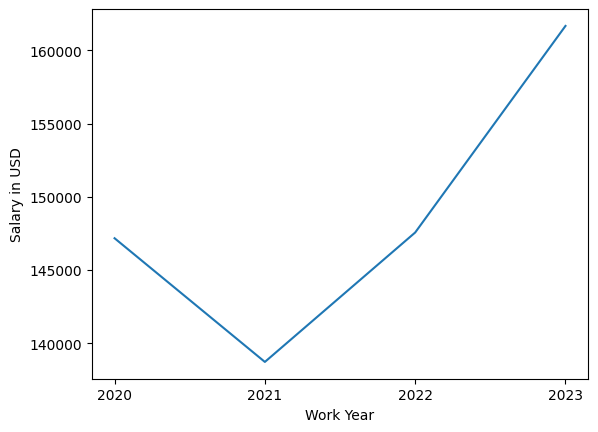

In [119]:
# line plot showing the trend of the salary over years
ax = sns.lineplot(
    df, x='work_year', y='salary_in_usd',
    estimator='mean', 
    errorbar=None,
)
# set the xticks
ax.set(xticks=np.arange(2020,2024,1))
ax.set(xlabel='Work Year', ylabel='Salary in USD')

We can see that there is no surprise overall salary increased over years except for 2021. The pandemic might account for the drop. let's check the situation for different experience level.

[Text(0.5, 0, 'Work Year'), Text(0, 0.5, 'Salary in USD')]

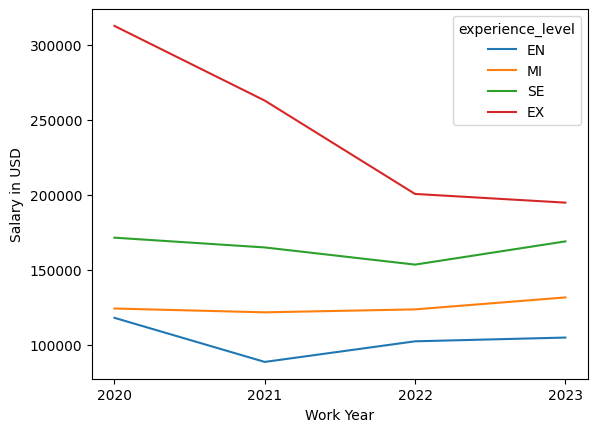

In [120]:
# line plot showing the trend of the salary over years
ax = sns.lineplot(
    df, x='work_year', y='salary_in_usd',
    hue='experience_level',
    hue_order=['EN','MI','SE','EX'],
    estimator='mean', 
    errorbar=None,
)
# set the xticks
ax.set(xticks=np.arange(2020,2024,1))
ax.set(xlabel='Work Year', ylabel='Salary in USD')

Surprise! We can see that there is a sharp decrease of the salary for EX level, which stands for the Executive-level / Director. There is also a slightly decrease for the Entry-level / Junior. The average salary for Senior-level / Expert experienced a decrease through 2020 to 2022 but return to the level of 2020 in 2023. The only group that has the overall increase in their salary is Mid-level / Intermediate employees and the increase can almost be ignored.

Since I am the entry level, I want to dig deeper for this group.

[Text(0.5, 0, 'Work Year'), Text(0, 0.5, 'Salary in USD')]

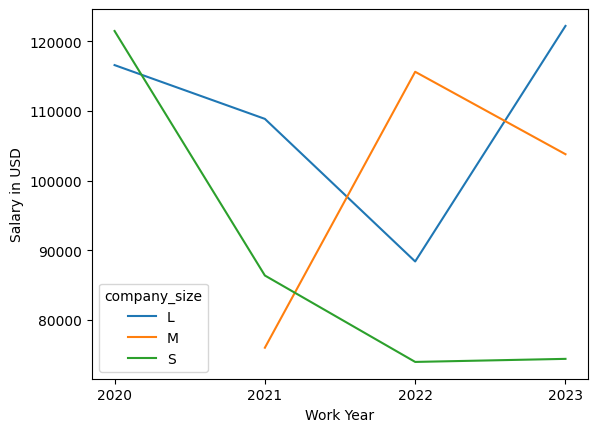

In [121]:
# line plot showing the trend of the salary for entrylevel employees in different company sizes over years
ax = sns.lineplot(
    df[df['experience_level']=='EN'], x='work_year', y='salary_in_usd',
    hue='company_size',
    hue_order=['L','M','S'],
    estimator='mean', 
    errorbar=None,
)
# set the xticks
ax.set(xticks=np.arange(2020,2024,1))
ax.set(xlabel='Work Year', ylabel='Salary in USD')

It looks like small company is not a good choice for entry level candidates.

## Assumption 2
We assume that the average salary for some titles is generaly higher than other tiltes, for example, the salary for Data scientist will be higher than that of Data analyist.

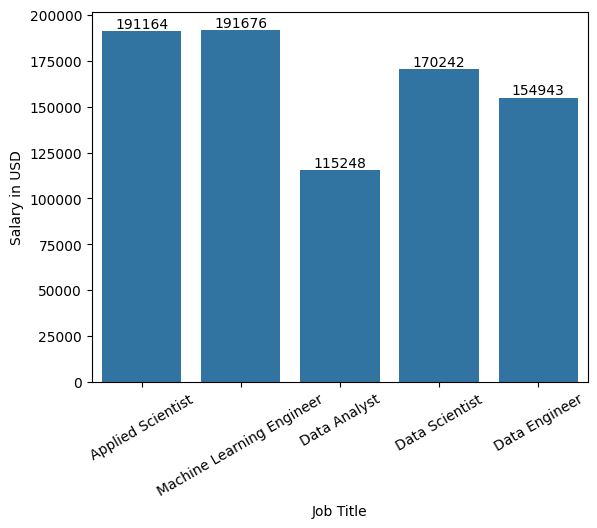

In [122]:
#fillter the data for roles that have more than 200 records.
a=df[df.groupby('job_title')['job_title'].transform('count') > 200]
#Bar plot for average salaries for different job titles.
ax = sns.barplot(
    a, x='job_title', y='salary_in_usd',    
    estimator='mean', 
    errorbar=None,
)
# set the label
ax.tick_params(axis='x', rotation=30)
ax.set(xlabel='Job Title', ylabel='Salary in USD')
ax.bar_label(ax.containers[0], fontsize=10);

Overall, the data analyst role has the lowest salary, while the Applied Scientist and Machine Learning Engineer have the highest salary.

Are there any difference of the salary gaps among different roles for different experience level, let’s check them out.

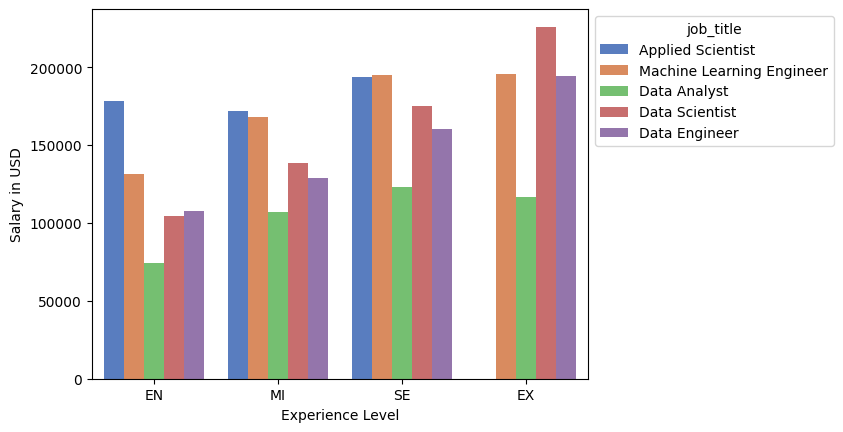

In [123]:

#Bar plot for average salaries for different job titles.
ax = sns.barplot(
    a, x='experience_level', y='salary_in_usd',
    hue='job_title',
    estimator='mean', 
    errorbar=None,
    palette="muted"
)
# set the label
ax.set(xlabel='Experience Level', ylabel='Salary in USD')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

You can see that as your experience level goes up, the salary gap between data analyst and data scientist become larger. Data analyst seems not a very good career path becuase your pay may not increase much even if your experence increase a lot while Data scientist and Data engineer earn more as experience increase.

Let's add company size into consideration.

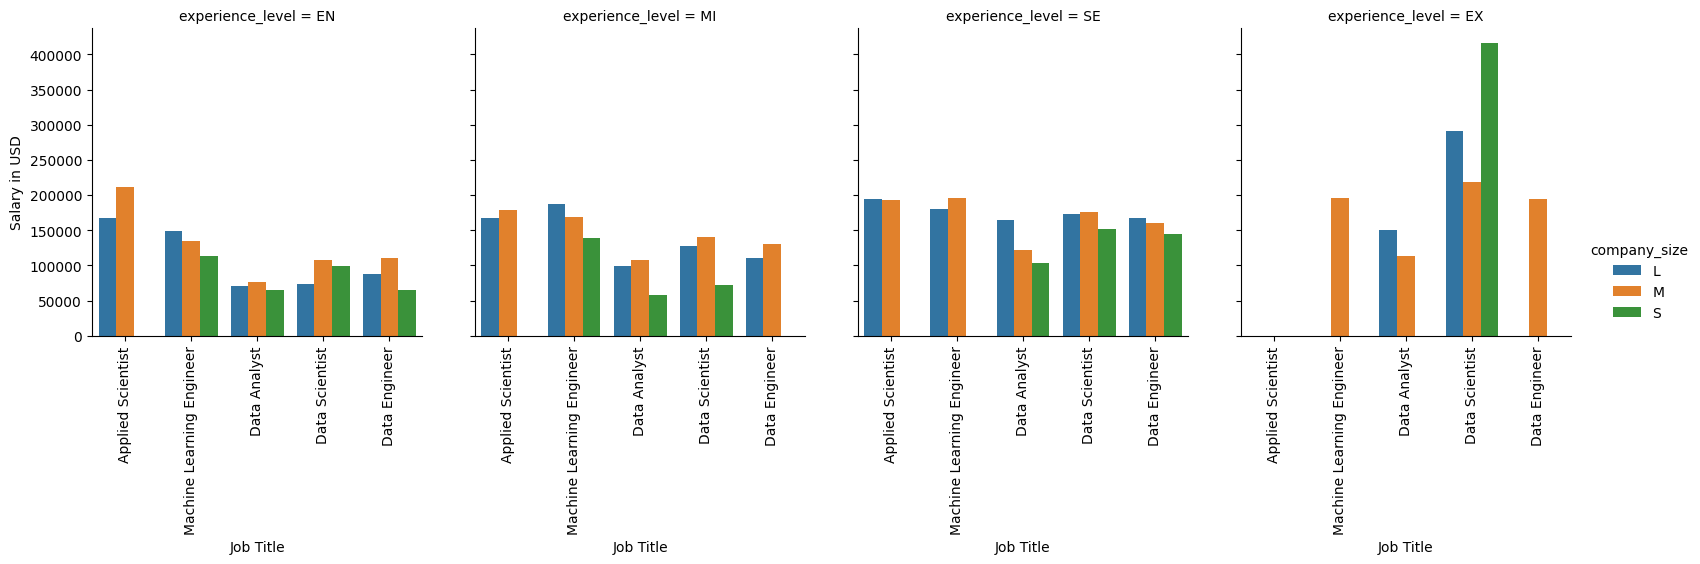

In [130]:
ax=sns.catplot(
    a, kind="bar",
    x="job_title", y="salary_in_usd", col="experience_level",
    hue='company_size',
    hue_order=['L','M','S'],
    height=4, aspect=1,
    errorbar=None,
    estimator='mean'
)
ax.tick_params(axis='x', rotation=90)
# set the label
ax.set(xlabel='Job Title', ylabel='Salary in USD')

If you want to become a data scientist, medium size company pay more for all experience levels except the Executive-level. If you are at the Executive-level, you might love to go to small companies if you want earn more. But if you want to become a data analyst, you should choose medium size company at first, and once you reach the Senior-level, you should move to big company.

## Assumption 3
Generally, we believe that the salary level for different employment type would be different.  The salary of full-time position should higher than the contract /Part-time / Freelance position if the employees have the same experience level. 

In [125]:
df.employment_type.value_counts()

employment_type
FT    7067
CT      13
PT       4
FL       4
Name: count, dtype: int64

Most of the position are full time position.

[Text(0.5, 0, 'Employment Type'), Text(0, 0.5, 'Salary in USD')]

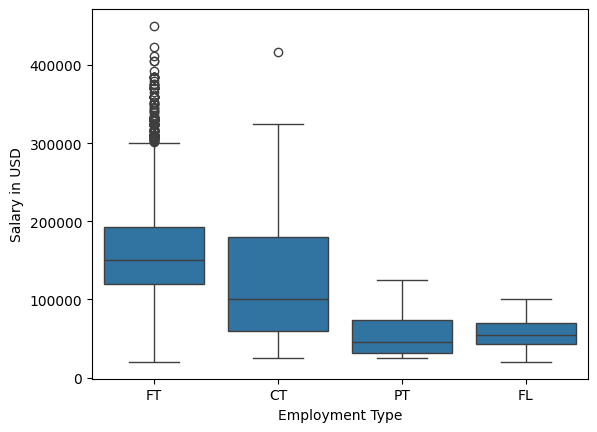

In [126]:
ax=sns.boxplot(
    df,
    x="employment_type",
    y="salary_in_usd", 
)
# set the label
ax.set(xlabel='Employment Type', ylabel='Salary in USD')

If we don’t consider the experience level, no surprise that the full-time positions earn more, then is the contract positions and part-time/freelance positions.

What if we consider the seniority?

[Text(0.5, 0, 'Employment Type'), Text(0, 0.5, 'Salary in USD')]

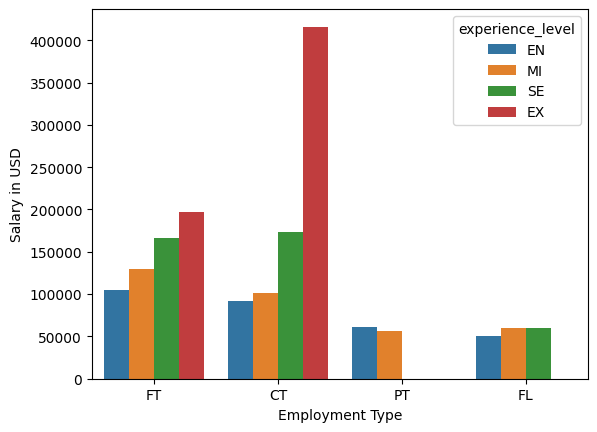

In [127]:
ax=sns.barplot(
    df,
    x="employment_type",
    y="salary_in_usd", 
    hue="experience_level",
    hue_order=['EN','MI','SE','EX'],
    errorbar=None
)
ax.set(xlabel='Employment Type', ylabel='Salary in USD')

It seems you can earn a lot more money for a contract position if you reach the Executive-level.

Then what kind of companies are more likely to hire contract employees?

In [131]:
#subset the data
b=df[df['employment_type'].isin(['CT','PT','FL'])]

[Text(0.5, 0, 'Employment Type'), Text(0, 0.5, 'Count')]

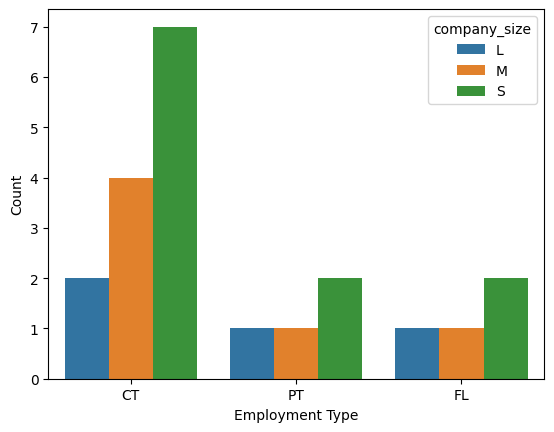

In [132]:
ax=sns.countplot(b,
                 x='employment_type',
                 hue='company_size',
                 hue_order=['L','M','S'])

ax.set(xlabel='Employment Type', ylabel='Count')

looks like small companies are more likely to have contract positions.

## Assumption 4
Are you looking for more work flexibility? Want more portion of remote for your position. We would assume that big companies are more likely to offer remote job than small companies. And as the seniority increase, the flexibility of your work will increase.

In [134]:
df.remote_ratio.value_counts()

remote_ratio
0      4379
100    2663
50       46
Name: count, dtype: int64

In [178]:
company_remote=pd.DataFrame(df.groupby('company_size').remote_ratio.value_counts())
company_remote['company_size'] = company_remote.index.get_level_values(0)
company_remote['remote_ratio'] = company_remote.index.get_level_values(1)
company_remote=company_remote.reset_index(drop=True)
company_remote['Percentage']=round((company_remote['count']/company_remote.groupby('company_size')['count'].transform('sum'))*100,2)

In [179]:
company_remote

,count,company_size,remote_ratio,Percentage
0,289,L,0,59.59
1,165,L,100,34.02
2,31,L,50,6.39
3,4078,M,0,62.38
4,2453,M,100,37.52
5,6,M,50,0.09
6,45,S,100,68.18
7,12,S,0,18.18
8,9,S,50,13.64


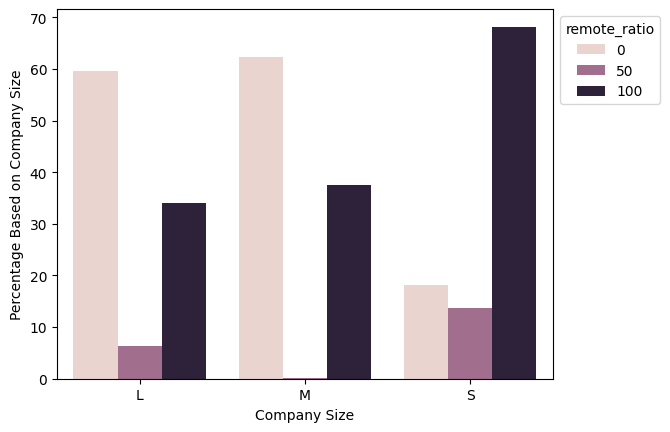

In [190]:
ax=sns.barplot(company_remote,
                 x='company_size',
                 y='Percentage',
                 hue='remote_ratio',
                 errorbar=None)

ax.set(xlabel='Company Size', ylabel='Percentage Based on Company Size')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Small companies are more likely to offer 100% remote positions compared to Large or Medium size companies.

In [188]:
seniority_remote=pd.DataFrame(df.groupby('experience_level').remote_ratio.value_counts())
seniority_remote['experience_level'] = seniority_remote.index.get_level_values(0)
seniority_remote['remote_ratio'] =seniority_remote.index.get_level_values(1)
seniority_remote=seniority_remote.reset_index(drop=True)
seniority_remote['Percentage']=round((seniority_remote['count']/seniority_remote.groupby('experience_level')['count'].transform('sum'))*100,2)

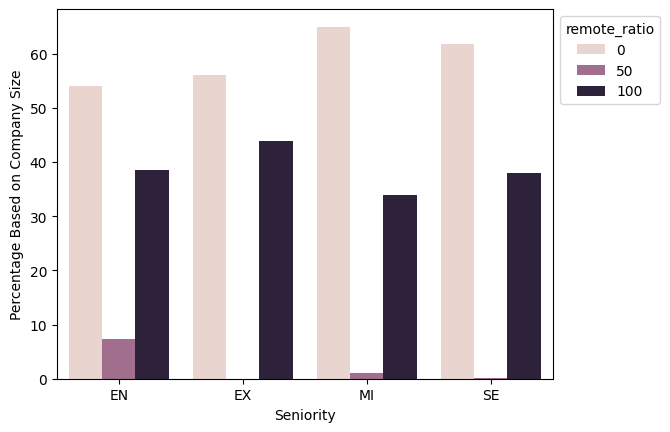

In [189]:
ax=sns.barplot(seniority_remote,
                 x='experience_level',
                 y='Percentage',
                 hue='remote_ratio',
                 errorbar=None)

ax.set(xlabel='Seniority', ylabel='Percentage Based on Company Size')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

No doubt, Executive-level positions have the highest work flexibility. But surprisingly, the next highly flexible position is the Entry-level position. Mid-level positions have the lowest flexibility in general.

In [191]:
type_remote=pd.DataFrame(df.groupby('employment_type').remote_ratio.value_counts())
type_remote['employment_type'] = type_remote.index.get_level_values(0)
type_remote['remote_ratio'] =type_remote.index.get_level_values(1)
type_remote=type_remote.reset_index(drop=True)
type_remote['Percentage']=round((type_remote['count']/type_remote.groupby('employment_type')['count'].transform('sum'))*100,2)

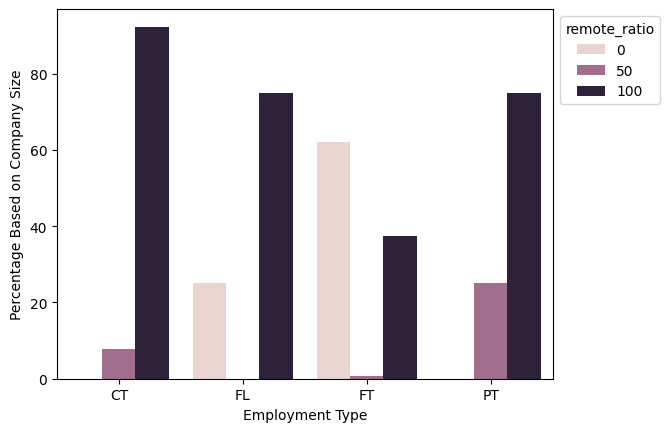

In [193]:
ax=sns.barplot(type_remote,
                 x='employment_type',
                 y='Percentage',
                 hue='remote_ratio',
                 errorbar=None)

ax.set(xlabel='Employment Type', ylabel='Percentage Based on Company Size')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Contract jobs are more likely to have the 100% remote opportunity.